# EDA

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FN = '../data/train.csv'
TWITTER_BLUE = '#1DA1F2'

df = pd.read_csv(DATA_FN)
for col in df.columns:
    print(col)

created_at
default_profile
default_profile_image
description
favourites_count
followers_count
friends_count
geo_enabled
id
lang
location
profile_background_image_url
profile_image_url
screen_name
statuses_count
verified
average_tweets_per_day
account_age_days
account_type


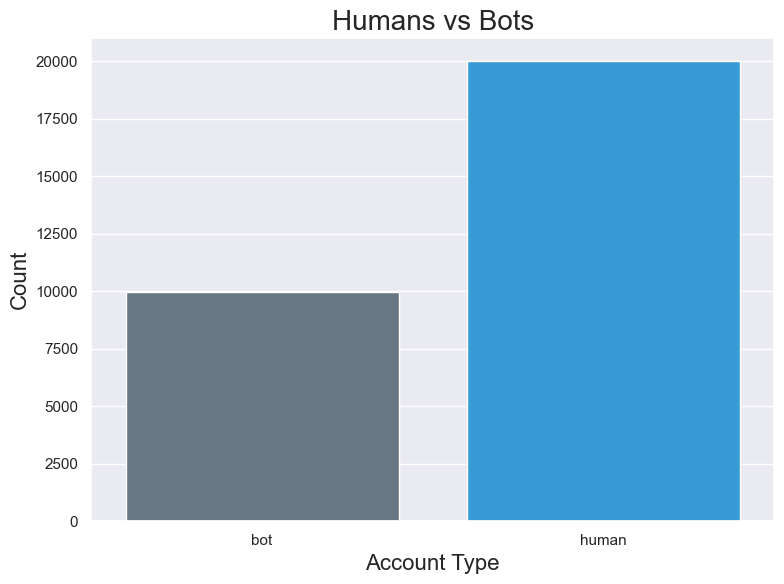

In [104]:
# Number of humans vs bots
plt.figure(figsize=(8, 6))
sns.countplot(x='account_type', data=df, palette=['#657786', TWITTER_BLUE])

plt.title('Humans vs Bots', fontsize=20)
plt.xlabel('Account Type', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.set_theme()
plt.tight_layout()
plt.show()

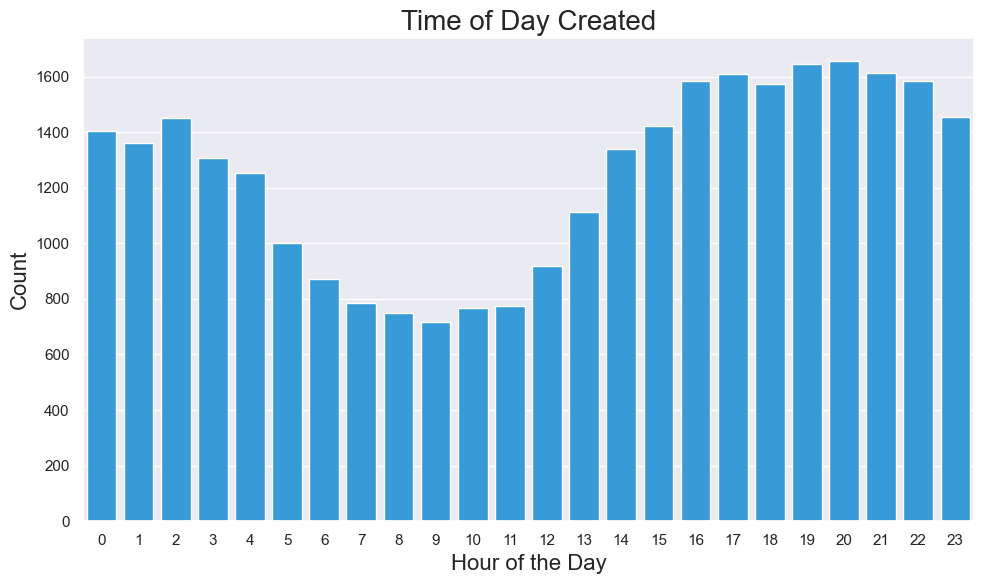

In [102]:
# Time of day accounts were created
df['created_at'] = pd.to_datetime(df['created_at'])
hours = [date.hour for date in df['created_at']]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=hours, color=TWITTER_BLUE)
plt.title('Time of Day Created', fontsize=20)
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.set_theme()
plt.tight_layout()
plt.show()

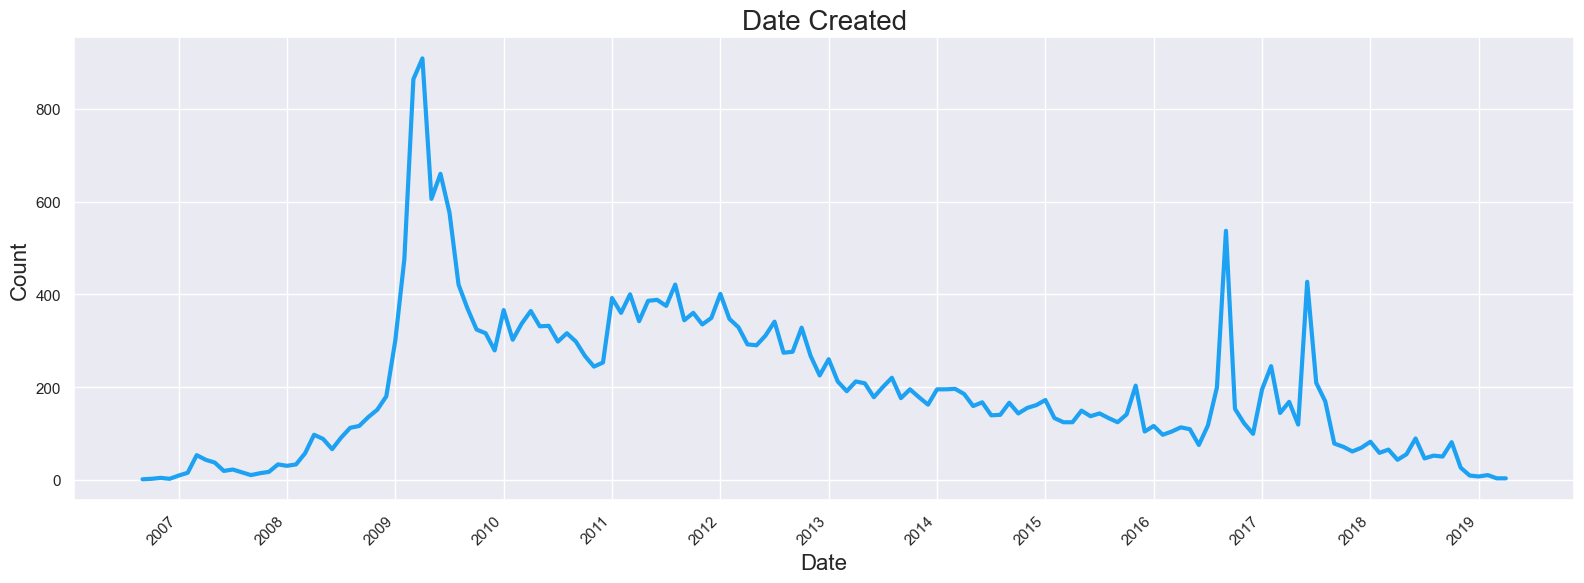

In [103]:
# Time of year accounts were created
month_year = df['created_at'].dt.to_period('M')
count_by_month_year = month_year.value_counts().sort_index()

# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(x=count_by_month_year.index.astype(str), y=count_by_month_year.values, 
                marker='', linewidth=3, color=TWITTER_BLUE)
plt.title('Date Created', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
tick_positions = [str(period) for period in count_by_month_year.index if period.month == 1]
tick_labels = [period.year for period in count_by_month_year.index if period.month == 1]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

sns.set_theme()
plt.tight_layout()
plt.show()